## Análise exploratória

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud

### Análise inicial

In [2]:
df = pd.read_csv('dados/id_desc.csv')
df.shape

(3617, 2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617 entries, 0 to 3616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3617 non-null   object
 1   desc    3553 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


In [4]:
pd.set_option('display.max_colwidth', None)
df.sample(3)

,id,desc
911,1242114d-5fdd-4a83-8219-0af3ed39addf,Interhouse is an e-commerce platform that sells additives for fuel and lubricants.
1193,2a98f36a-db52-498d-8792-319b5e89e82d,"Skai is an AI-powered platform that offers consumer and market insights, strategic planning, omnichannel media activation, testing, and measurement services to brands and retailers.It is the go-to-market engine that enables smarter decisions and better outcomes with actionable intelligence in making customer connections. The platform includes asuite of data-driven products for market intelligence, omnichannel media activation, testing, and measurement, enabling brands and agencies to make predictions, improve strategic planning and drive growth on the most important customer channels. Skai’s machine-learning algorithms and proprietary NLP enable companies to listen, predict and keep pace with the consumer journey. The company is on a mission to empower businesses with data they can trust, insights they can use, and the impact they can measure.It was founded in Tel Aviv, Tel Aviv, Israel in 2006 by Yoav Izhar-Prato, Nir Cohen, Amos Talmor, and Alon Sheafer. Operating in 15 international locations and backed by Sequoia Capital, Arts Alliance, Tenaya Capital, and Bain Capital Ventures, Skai™ generates over $350 billion in annualized revenue for the world’s top brands.Read More"
1530,4721021d-4efb-4d77-aacd-d30eab334a5f,"ThreatQuotient is a threat intelligence platform (TIP) that centrally manages and correlates unlimited external sources with all internal security and analytics solutions for contextual, operationalized intelligence in a single pane of glass. It provides Indicator Nurturing, which goes beyond enrichment to help customers tailor indicators ofcompromise (IOCs) more specifically to their infrastructure.It improves the efficiency and effectiveness of security operations with a platform that accelerates and simplifies investigations and collaboration within and across teams and tools. Integrating an organization’s existing processes and technologies into a unified workspace, ThreatQuotient’s solutions reduce noise, highlight top priority threats, and automate processes to provide greater focus and decision support while maximizing limited resources. Its threat-centric approach supports multiple use cases including incident response, threat hunting, spear phishing, alert triage, and vulnerability management, and also serves as a threat intelligence platform.ThreatQuotient has been recognized for product excellence and industry leadership by several award programs in 2021. It has won four 2021 Globee Cybersecurity Excellence Awards, including Gold for Security Investigation, Silver for both Threat Intelligence Technology and Hot Security Company of the Year, and Bronze for Threat Hunting, Detection, Intelligence, and Response. ThreatQuotient also won three 2021 Cybersecurity Excellence Awards: Gold for Security Investigation, and Silver for both Threat Detection, Intelligence and Response, and Best Cybersecurity Company. Additionally, ThreatQuotient was recognized as McAfee Partner of the Year for the second consecutive year and the company was listed in the 2021 CRN Partner Program Guide.Headquartered in Northern Virginia, ThreatQuotient was founded in 2013 by Ryan Trost and Wayne Chiang.Read More"


#### Remove nulos

In [5]:
qtd_desc_nulos = df['desc'].isna().sum()
print(f'Remove {qtd_desc_nulos} amostras com descrição nula')
df = df.dropna()
print('Qtd. de amostras:', df.shape[0])

Remove 64 amostras com descrição nula
Qtd. de amostras: 3553


#### Remove duplicados

In [6]:
qtd_desc_duplic = df['desc'].duplicated().sum()
print(f'Remove {qtd_desc_duplic} amostras com descrição duplicada')
df = df.drop_duplicates(subset='desc')
print('Qtd. de amostras:', df.shape[0])

Remove 101 amostras com descrição duplicada
Qtd. de amostras: 3452


### Analise textual
### Frequências

In [7]:
pd.set_option('display.max_colwidth', 50)

#### Quantidade de caracteres por descrição

In [8]:
desc_len = df['desc'].str.len()
desc_len.describe()

count    3452.000000
mean      527.343859
std       379.409009
min        11.000000
25%       276.750000
50%       475.000000
75%       688.000000
max      5228.000000
Name: desc, dtype: float64

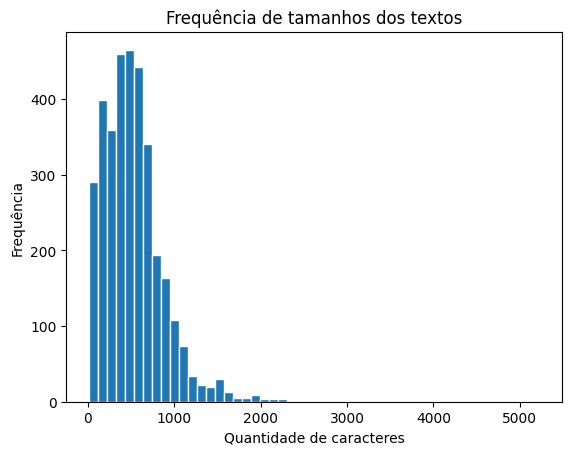

In [9]:
#ax = desc_len.plot.hist(bins=100)
ax = desc_len.plot.hist(bins=50, edgecolor='white')
ax.set_title('Frequência de tamanhos dos textos')
ax.set_xlabel('Quantidade de caracteres')
ax.set_ylabel('Frequência')
plt.show()

#### Quantidade de frases

In [10]:
df['desc_sent'] = df['desc'].apply(nltk.sent_tokenize)

In [11]:
sent_counts = df['desc_sent'].apply(len)

In [12]:
sent_counts.describe()

count    3452.000000
mean        3.152086
std         2.265304
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        57.000000
Name: desc_sent, dtype: float64

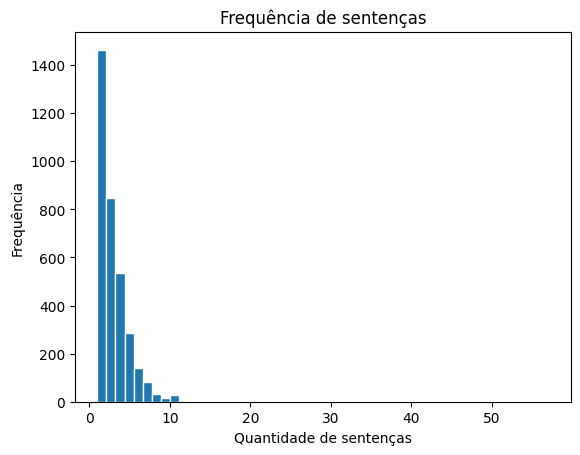

In [13]:
ax = sent_counts.plot.hist(bins=50, edgecolor='white')
ax.set_title('Frequência de sentenças')
ax.set_xlabel('Quantidade de sentenças')
ax.set_ylabel('Frequência')
plt.show()

#### Quantidade de tokens por descrição

In [14]:
stopwords = nltk.corpus.stopwords.words('english')
def tokenize_text(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)                        # Remove pontuação
    text = text.lower()                                             # Transforma em minúsculo
    tokens = nltk.word_tokenize(text)                               # Tokeniza texto
    tokens = [token for token in tokens if not token in stopwords]  # Remove stop words
    return tokens

df['desc_token_clr'] = df['desc'].apply(tokenize_text)

In [15]:
token_counts_clr = df['desc_token_clr'].apply(len)
token_counts_clr.describe()

count    3452.000000
mean       51.980881
std        37.616130
min         2.000000
25%        27.000000
50%        46.000000
75%        68.000000
max       514.000000
Name: desc_token_clr, dtype: float64

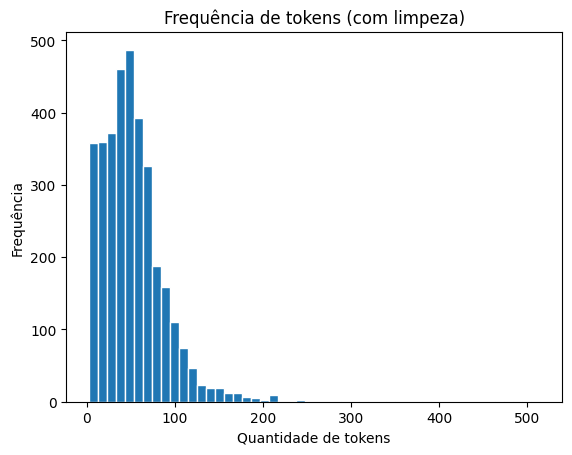

In [16]:
ax = token_counts_clr.plot.hist(bins=50, edgecolor='white')
ax.set_title('Frequência de tokens (com limpeza)')
ax.set_xlabel('Quantidade de tokens')
ax.set_ylabel('Frequência')
plt.show()

### Principais tokens, bigramas e trigramas

#### Tokens

In [17]:
token_counts_clr_freq = df.explode('desc_token_clr') \
                           ['desc_token_clr'].value_counts()

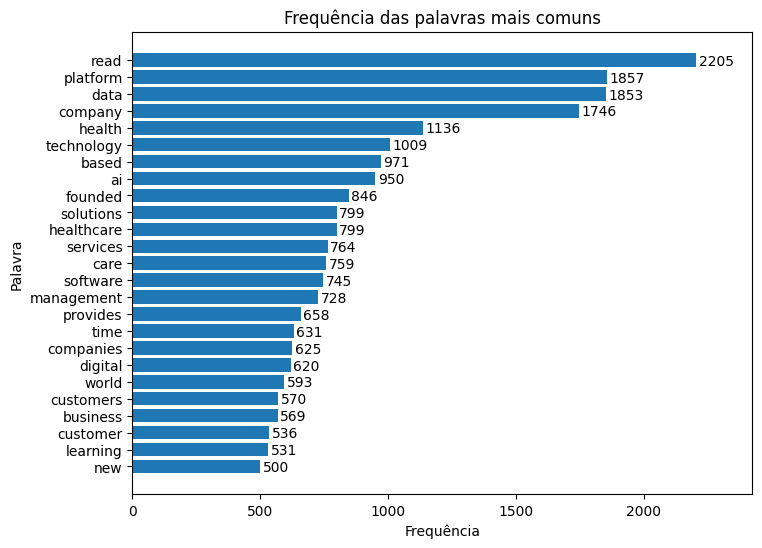

In [18]:
top_words = token_counts_clr_freq.head(25)

plt.figure(figsize=(8, 6))
plt.barh(top_words.index, top_words.values)
plt.xlabel('Frequência')
plt.ylabel('Palavra')
plt.title('Frequência das palavras mais comuns')
plt.gca().invert_yaxis()
for i, v in enumerate(top_words.values):
    plt.text(v + 10, i + 0.3, str(v), color='black')
plt.xlim(0, top_words.values.max() * 1.1)
plt.show()

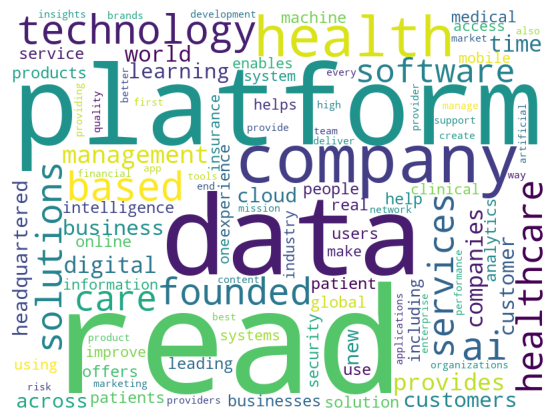

In [19]:
wordcloud = WordCloud(width=800, height=600, background_color='white', max_words=100)
wordcloud.generate_from_frequencies(token_counts_clr_freq)

plt.figure(figsize=(6, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Bigramas

In [20]:
df['desc_bigram_clr'] = df['desc_token_clr'].apply(lambda x: [' '.join(bigram) for bigram in list(nltk.bigrams(x))])

In [21]:
bigram_counts_clr_freq = df.explode('desc_bigram_clr') \
                            ['desc_bigram_clr'].value_counts()

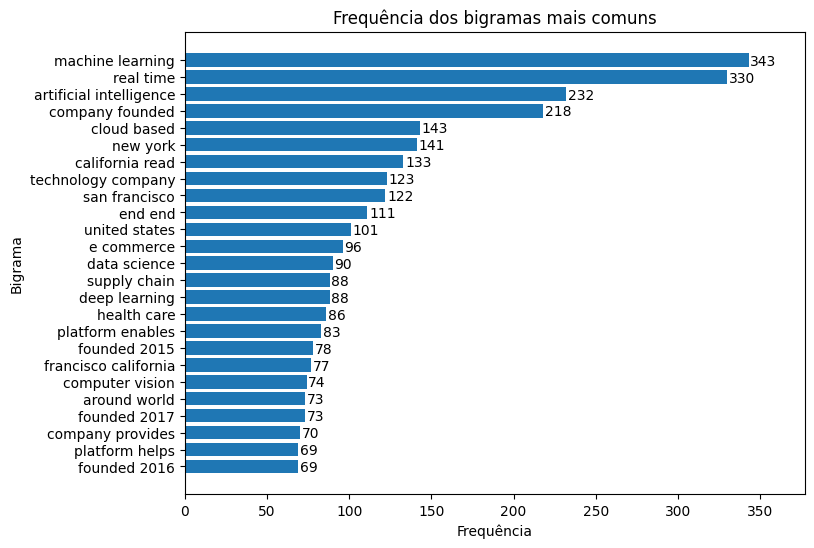

In [22]:
top_bigrams = bigram_counts_clr_freq.head(25)

plt.figure(figsize=(8, 6))
plt.barh(top_bigrams.index, top_bigrams.values)
plt.xlabel('Frequência')
plt.ylabel('Bigrama')
plt.title('Frequência dos bigramas mais comuns')
plt.gca().invert_yaxis()
for i, v in enumerate(top_bigrams.values):
    plt.text(v + 1, i + 0.3, str(v), color='black')
plt.xlim(0, top_bigrams.values.max() * 1.1)
plt.show()

#### Trigramas

In [23]:
df['desc_trigram_clr'] = df['desc_token_clr'].apply(lambda x: [' '.join(trigram) for trigram in list(nltk.trigrams(x))])

In [24]:
trigram_counts_clr_freq = df.explode('desc_trigram_clr') \
                             ['desc_trigram_clr'].value_counts()

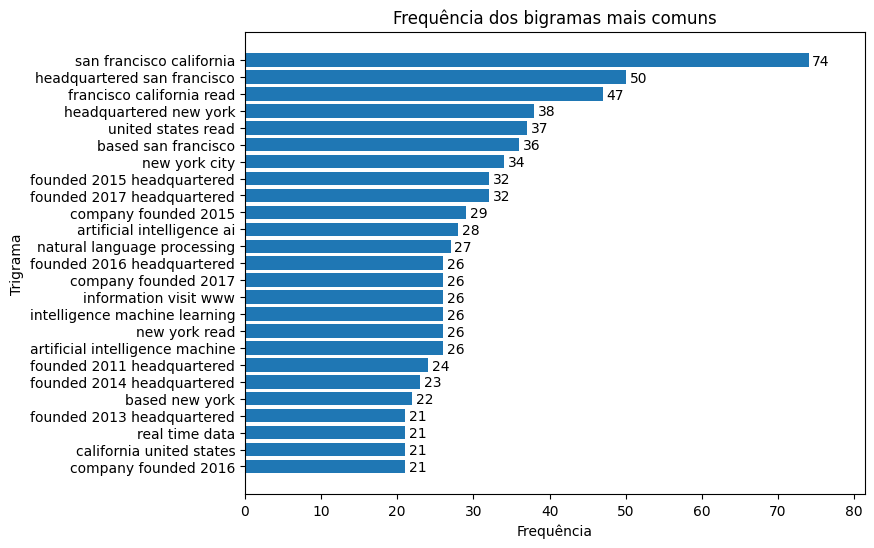

In [25]:
top_trigrams = trigram_counts_clr_freq.head(25)

plt.figure(figsize=(8, 6))
plt.barh(top_trigrams.index, top_trigrams.values)
plt.xlabel('Frequência')
plt.ylabel('Trigrama')
plt.title('Frequência dos bigramas mais comuns')
plt.gca().invert_yaxis()
for i, v in enumerate(top_trigrams.values):
    plt.text(v + 0.5, i + 0.3, str(v), color='black')
plt.xlim(0, top_trigrams.values.max() * 1.1)
plt.show()

### Exporta arquivo

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 0 to 3615
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3452 non-null   object
 1   desc              3452 non-null   object
 2   desc_sent         3452 non-null   object
 3   desc_token_clr    3452 non-null   object
 4   desc_bigram_clr   3452 non-null   object
 5   desc_trigram_clr  3452 non-null   object
dtypes: object(6)
memory usage: 188.8+ KB


In [29]:
df.to_parquet('dados/id_desc_clr.parquet')